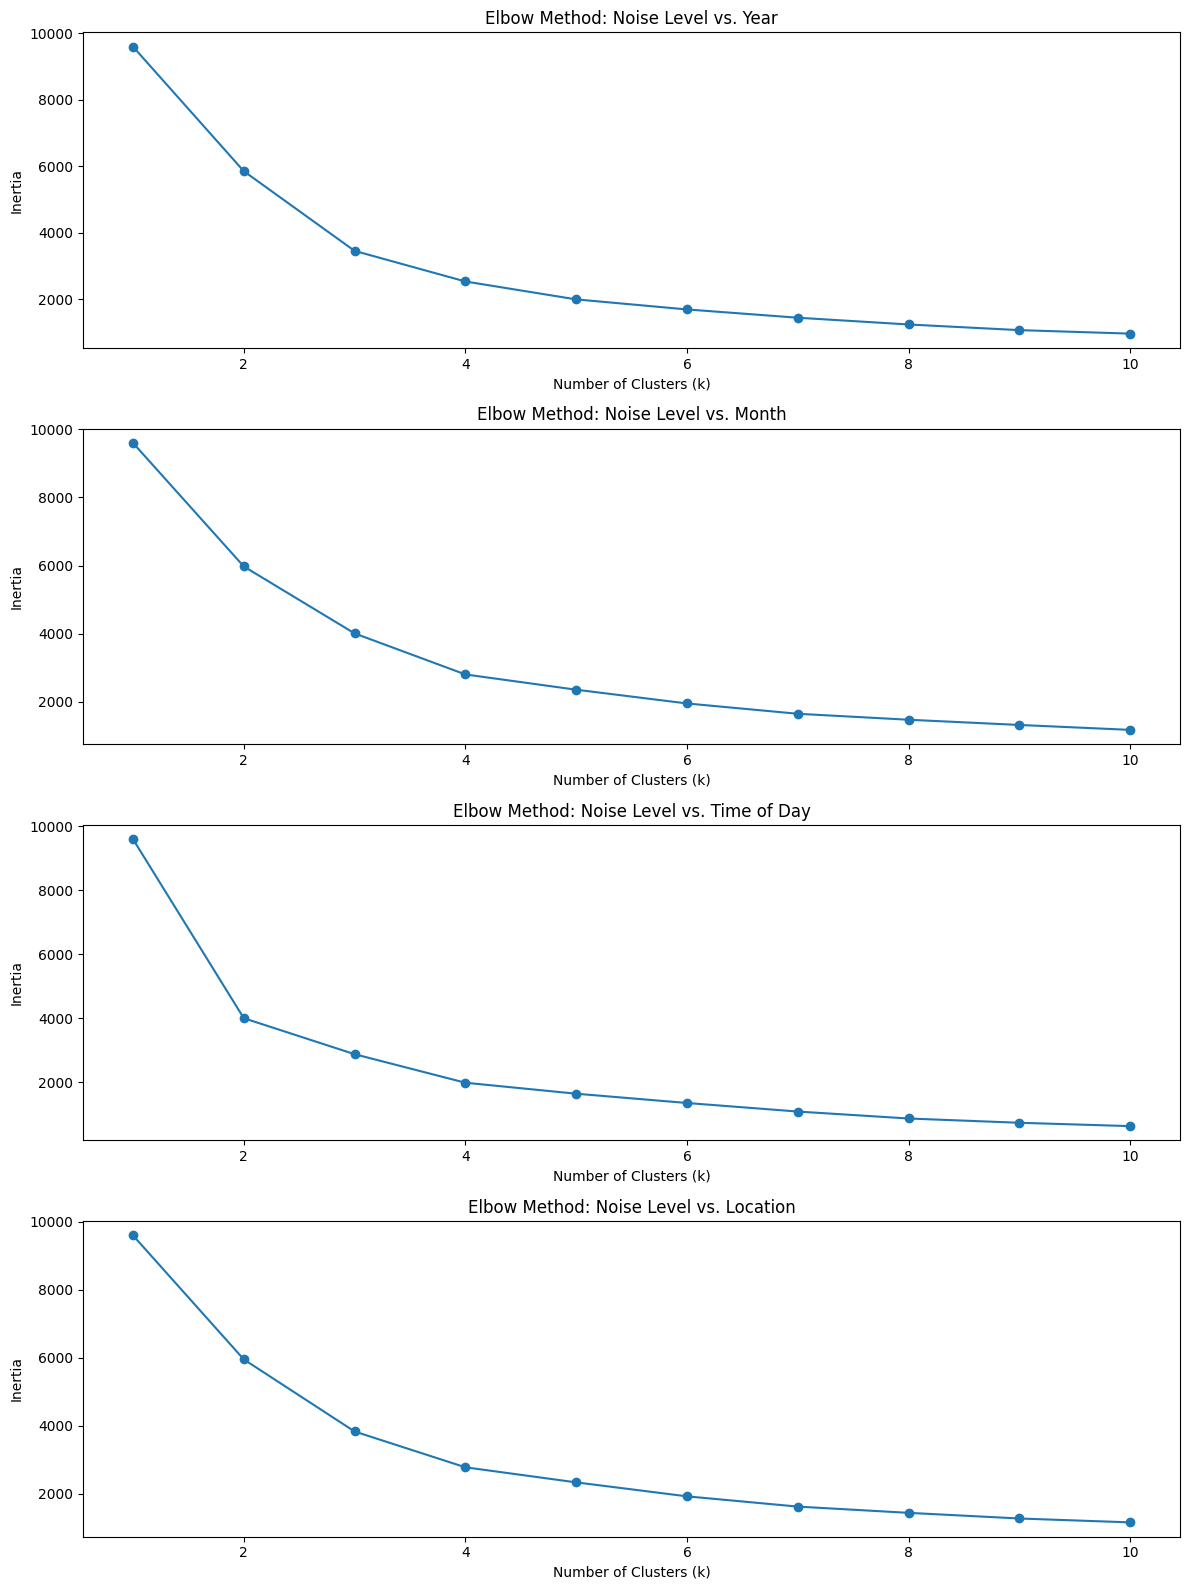

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Load the dataset
file_path = "/content/london_noise_pollution_final.csv"
df = pd.read_csv(file_path)

# Identify variables (excluding 'Noise Level (dB)')
variables = [col for col in df.columns if col != 'Noise Level (dB)']

# Prepare a figure for subplots
plt.figure(figsize=(12, len(variables) * 4))

# Loop through each variable to run the elbow method
for i, var in enumerate(variables, 1):
    # Copy dataset
    df_temp = df[['Noise Level (dB)', var]].copy()

    # Encode categorical variables
    if df_temp[var].dtype == 'object':
        encoder = LabelEncoder()
        df_temp[var] = encoder.fit_transform(df_temp[var])

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_temp)

    # Run the elbow method (1 to 10 clusters)
    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    # Plot elbow graph
    plt.subplot(len(variables), 1, i)
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title(f"Elbow Method: Noise Level vs. {var}")

# Show all plots
plt.tight_layout()
plt.show()
